## Problema de tres cuerpos restringido gravitacionalmente

**Ecuación de movimiento**

El movimiento de los planetas se puede calcular a partir de las ecuaciones de movimiento de Newton. Consideramos movimiento bidimensional. Para un sistema de tres cuerpos, en este caso **Tierra - Jupiter - Sol**, se puede usar un conjunto de ecuaciones diferenciales acopladas para expresar el sistema. Se pueden expresar usando notación vectorial. Con $\vec{r} = x\hat{\imath} + y\hat{\jmath} $

Donde,$\hat{\imath}$ y $\hat{\jmath}$ son vectores unitarios a lo largo de los ejes $x$ y $y$. Entonces, la ecuación diferencial de movimiento de un planeta es:

\begin{equation} \tag{1} 
\frac{ \mathrm{d}^2 \vec{r}}{\mathrm{d}t^2} = \frac{\vec{F}}{M_T}
\end{equation}

**Forma adimensional de la ecuación diferencial**

También definimos las siguientes variables adimensionales

$$\hat{t} = \frac{t}{T}$$

$$\hat{r} = \frac{\vec{r}}{R}$$

$$\hat{M_T} = \frac{M_T}{M}$$ $M_T$ Masa de la Tierra

$$\hat{M_S} = \frac{M_S}{M}$$

$M_S$ Masa del Sol

$$\hat{F} = \frac{\vec{F}}{F^*}$$

Observamos que las derivadas se pueden escribir en términos de las cantidades adimensionales como:

\begin{equation}\tag{2} 
\frac{ \mathrm{d} \vec{r}}{\mathrm{d}t} = \frac{R}{T} \frac{ \mathrm{d} \hat{r}}{\mathrm{d}\hat{t}}
\end{equation}

\begin{equation}\tag{3} 
\frac{ \mathrm{d}^2 \vec{r}}{\mathrm{d}t^2} = \frac{R}{T^2} \frac{ \mathrm{d}^2 \hat{r}}{\mathrm{d}\hat{t}^2}
\end{equation}

Sustituyendo estos valores en la Ecuación (1), obtenemos:

\begin{equation}\tag{4} 
\frac{R}{T^2}\frac{ \mathrm{d}^2 \hat{r}}{\mathrm{d}\hat{t}^2} = \frac{F^{*}\hat{F}}{\hat{M_T}M}
\end{equation}

\begin{equation}\tag{5} 
\frac{ \mathrm{d}^2 \hat{r}}{\mathrm{d}\hat{t}^2}  = \frac{\hat{F}}{\hat{M_T}} \frac{ F^*T^2}{RM}
\end{equation}

Como, 

$$\frac{ F^*T^2}{RM} = 1$$

$$F^* = \frac{RM}{T^2}$$

Entonces, la Ecuación (5) se convierte en:

\begin{equation}\tag{6} 
\frac{ \mathrm{d}^2 \hat{r}}{\mathrm{d}\hat{t}^2}  = \frac{\hat{F}}{\hat{M_T}}
\end{equation}

Tenidendo en cuenta que la Ecuación (6) es adimensional. Se puede descomponer en dos ecuaciones de primer orden acopladas:

\begin{equation}\tag{7} 
\frac{ \mathrm{d} \hat{r}}{\mathrm{d}\hat{t}}  = \hat{v}
\end{equation}

\begin{equation}\tag{8} 
\frac{ \mathrm{d} \hat{v}}{\mathrm{d}\hat{t}}  = \frac{\hat{F}}{\hat{M_T}}
\end{equation}

Por lo tanto, la Ecuación (7) y la Ecuación (8) son las EDO de primer orden acopladas adimensionales requeridas para la solución del problema.


La fuerza viene dada por la ley de Newton:

\begin{equation} 
|\vec{F}| = \frac{ GM_TM_S}{|\vec{r}|^2} = \frac{\hat{M_T}\hat{M_S}}{|\hat{r}|^2}\frac{GM^2}{R^2}
\end{equation}

Entonces,

\begin{equation} \tag{9}
|\hat{F}| = \frac{\hat{M_T}\hat{M_S}}{|\hat{r}|^2}\frac{GM^2}{R^2}\frac{1}{F^*}= \frac{\hat{M_T}\hat{M_S}}{|\hat{r}|^2}\frac{GM^2}{R^2}\frac{T^2}{RM} =  \frac{\hat{M_T}\hat{M_S}}{|\hat{r}|^2}\frac{GMT^2}{R^3} = \frac{\hat{G}\hat{M_T}\hat{M_S}}{|\hat{r}|^2}
\end{equation}

Donde, 

$$\hat{G} = \frac{GMT^2}{R^3}$$

Finalmente, considerando la dirección de la fuerza:

\begin{equation} 
\vec{F} = |\vec{F}|cos(θ)\hat{\imath} + |\vec{F}|sin(θ)\hat{\jmath}
\end{equation}

con, $$\theta = tan^-1\frac{y}{x}$$


In [1]:
%matplotlib notebook  

In [44]:
import time
import math
import numpy as np
import pylab as py

import matplotlib.pyplot as plt

from matplotlib import animation, rc

In [46]:
# función de animación de inicialización: trazar el fondo de cada fotograma
def init():
    linea1.set_data([], [])
    linea2.set_data([], [])
    ttl.set_text('')
    
    return (linea1,linea2,ttl)

In [47]:
#Fuerza Tierra-Sol
def fuerza_ts(r):
    F = np.zeros(2)
    Fmag = GG*Mt*Ms/(np.linalg.norm(r)+1e-20)**2 # Utilizando la Ecuación (9)
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F

#Fuerza Jupiter-Sol
def fuerza_js(r):
    F = np.zeros(2)
    Fmag = GG*Mj*Ms/(np.linalg.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F

#Fuerza Tierra-Jupiter
def fuerza_tj(rt,rj):
    
    r = np.zeros(2)
    F = np.zeros(2)
    r[0] = rt[0] - rj[0]    
    r[1] = rt[1] - rj[1]    
    Fmag = GG*Mt*Mj/(np.linalg.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F


def fuerza(r,planeta,ro,vo):
    if planeta == 'tierra':
        return fuerza_ts(r) + fuerza_tj(r,ro)
    if planeta == 'jupiter':
        return fuerza_js(r) - fuerza_tj(r,ro)

# Derivada de la posición con respecto al tiempo
def dr_dt(t,r,v,planeta,ro,vo):
    return v
 
# Derivada de la velocidad con respecto al tiempo
def dv_dt(t,r,v,planeta,ro,vo):
    F = fuerza(r,planeta,ro,vo)
    if planeta == 'tierra':
        y = F/Mt
    if planeta == 'jupiter':
        y = F/Mj
    return y 

**Métodos de solución de ecuaciones diferenciales**

En el proyecto se usara el Método RK4

In [81]:
# Método de Euler
def Euler(t,r,v,h):
    z = np.zeros([2,2])
    r1 = r + h*dr_dt(t,r,v)
    v1 = v + h*dv_dt(t,r,v)
    z = [r1, v1]
    return z

# Método de Euler Cromer
def Euler_Cromer(t,r,v,h):
    z = np.zeros([2,2])
    r = r + h*dr_dt(t,r,v)
    v = v + h*dv_dt(t,r,v)
    z = [r, v]
    return z


# Método de RK4
def RK4(t,r,v,h,planeta,ro,vo):
    k11 = dr_dt(t,r,v,planeta,ro,vo) 
    k21 = dv_dt(t,r,v,planeta,ro,vo)
    
    k12 = dr_dt(t + 0.5*h,r + 0.5*h*k11,v + 0.5*h*k21,planeta,ro,vo)
    k22 = dv_dt(t + 0.5*h,r + 0.5*h*k11,v + 0.5*h*k21,planeta,ro,vo)
    
    k13 = dr_dt(t + 0.5*h,r + 0.5*h*k12,v + 0.5*h*k22,planeta,ro,vo)
    k23 = dv_dt(t + 0.5*h,r + 0.5*h*k12,v + 0.5*h*k22,planeta,ro,vo)
    
    k14 = dr_dt(t + h,r + h*k13,v + h*k23,planeta,ro,vo)
    k24 = dv_dt(t + h,r + h*k13,v + h*k23,planeta,ro,vo)
    
    y0 = r + h * (k11 + 2.*k12 + 2.*k13 + k14) / 6.
    y1 = v + h * (k21 + 2.*k22 + 2.*k23 + k24) / 6.
    
    z = np.zeros([2,2])
    z = [y0, y1]
    return z

In [49]:
# Calculo de la energía Cinética
def Energia_Cinetica(v):
    vn = np.linalg.norm(v)
    return 0.5*Mt*vn**2

# Calculo de la energía Potencial
def Energia_Potencial(r):
    fmag = np.linalg.norm(fuerza_ts(r))
    rmag = np.linalg.norm(r)
    return -fmag*rmag

#Calculo del Momento Angular
def Momento_Angular(r,v):
    rn = np.linalg.norm(r)
    vn = np.linalg.norm(v)
    r = r/rn
    v = v/vn
    rdotv = r[0]*v[0]+r[1]*v[1]
    theta = math.acos(rdotv)
    return Mt*rn*vn*np.sin(theta)


def Calc_Area(r1,r2):
    r1n = np.linalg.norm(r1)
    r2n = np.linalg.norm(r2)
    r1 = r1 + 1e-20
    r2 = r2 + 1e-20
    theta1 = math.atan(abs(r1[1]/r1[0]))
    theta2 = math.atan(abs(r2[1]/r2[0]))
    rn = 0.5*(r1n+r2n)
    del_theta = np.abs(theta1 - theta2)
    return 0.5*del_theta*rn**2

#Función para graficar

def mplot(fign,x,y,xl,yl,clr,lbl):
    py.figure(fign)
    py.xlabel(xl)    
    py.ylabel(yl)
    return py.plot(x,y,clr, linewidth =1.0,label = lbl)

El valor de las constantes de normalización se toman en unidades astronómicas:

$$T=365\times24\times60 segundos=1.0año$$
$$R=1.5\times10^{11}m=1.0AU$$
$$M=6\times10^{24}kg=1.0M_T$$

El sol se coloca en el origen y se supone que no tiene movimiento. La posición inicial de la Tierra se toma como $x = 1$ $AU$ y $y = 0$. La velocidad inicial se toma como $30 \frac{km}{s}$

In [50]:
Mt = 6e24                     # Massa de la Tierra en kg
Ms = 2e30                     # Masa del sol en kg                       
Mj = 1.9e27                   # Masa de Jupiter en kg

G = 6.673e-11                 # Constante Gravitacional

RR = 1.496e11                 # Normalizando la distancia en km (= 1 AU)
MM = 6e24                     # Normalizando la masa
TT = 365*24*60*60.0           # Normalizando el tiempo (1 año)

FF = (G*MM**2)/RR**2          # Fuerza unitaria
EE = FF*RR                    # Energía unitaria

GG = (MM*G*TT**2)/(RR**3)

Mt = Mt/MM                    # Masa normalizada de la Tierra
Ms = Ms/MM                    # Masa normalizada del Sol 
Mj = 500*Mj/MM                # Masa normalizada de Jupiter/Super Jupiter


ti = 0                # tiempo inicial = 0
tf = 120              # tiempo final = 120 años

 



N = 100*tf                   # 100 puntos por año
t = np.linspace(ti,tf,N)     # Arreglo de tiempo de ti a tf con N puntos 

h = t[2]-t[1]                # paso de tiempo (uniforme)


# Inicialización

EK = np.zeros(N)            # Energía Cinética
EP = np.zeros(N)            # Energía Potencial
MA = np.zeros(N)            # Momento Angular
AreaVal = np.zeros(N)       # Área barrida

r = np.zeros([N,2])         # Vector de posición de la Tierra
v = np.zeros([N,2])         # Vector de velocidad de la Tierra
rj = np.zeros([N,2])        # Vector de posición de Jupiter
vj = np.zeros([N,2])        # Vector de velocidad de Jupiter

ri = [1496e8/RR,0]      # posición inicial de la tierra
rji = [5.2,0]           # posición inicial de Jupiter




vv = np.sqrt(Ms*GG/ri[0])         # Magnitud de la velocidad inicial de la Tierra 

vvj = 13.06e3 * TT/RR             # Magnitud de la velocidad inicial de Júpiter

vi = [0, vv*1.0]                  # Vector de velocidad inicial para la Tierra. Tomado como a lo largo de la dirección y, 
                                  # ya que ri está en el eje x.
vji = [0, vvj*1.0]                # Vector de velocidad inicial para Júpiter


# Inicializar los Arreglos con valores iniciales.
t[0] = ti
r[0,:] = ri
v[0,:] = vi
rj[0,:] = rji
vj[0,:] = vji

"""
t1 = dr_dt(ti,ri,vi)
t2 = dv_dt(ti,ri,vi)
print t1
print t2
"""
EK[0] = Energia_Cinetica(v[0,:])
EP[0] = Energia_Potencial(r[0,:])
MA[0] = Momento_Angular(r[0,:],v[0,:])
AreaVal[0] = 0


In [51]:
for i in range(0,N-1):
    [r[i+1,:],v[i+1,:]]=RK4(t[i],r[i,:],v[i,:],h,'tierra',rj[i,:],vj[i,:])
    [rj[i+1,:],vj[i+1,:]]=RK4(t[i],rj[i,:],vj[i,:],h,'jupiter',r[i,:],v[i,:])
        
    EK[i+1] = Energia_Cinetica(v[i+1,:])
    EP[i+1] = Energia_Potencial(r[i+1,:])
    MA[i+1] = Momento_Angular(r[i+1,:],v[i+1,:])
    AreaVal[i+1] = AreaVal[i] + Calc_Area(r[i,:],r[i+1,:])

*   En la primera Grafica se evidencia la Orbita de la Tierra en Azul y la orbita del Super Jupiter en Verde
*   En la segunda Grafica se analizan las Energias Cinética y Potencial además de la Energía Total


<IPython.core.display.Javascript object>


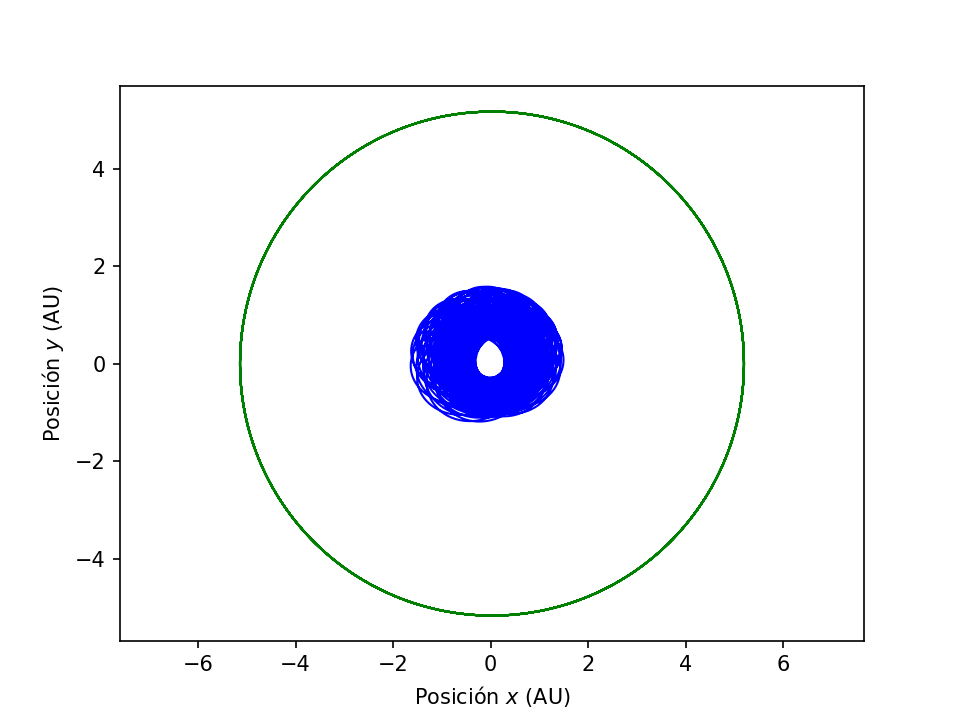

<IPython.core.display.Javascript object>


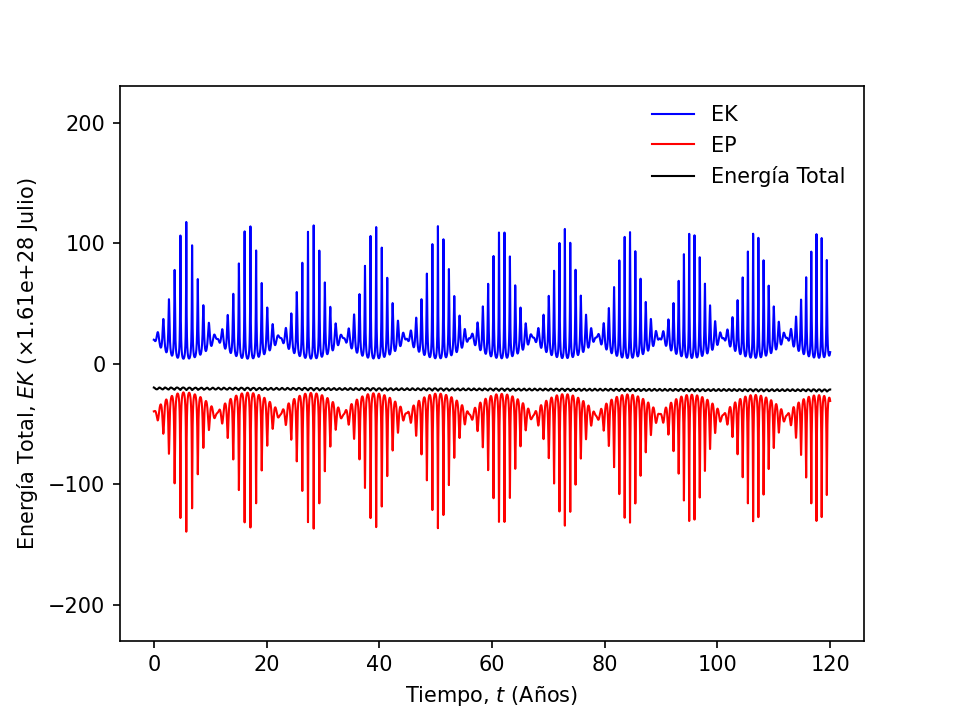

(-230.0, 230.0)

In [52]:
# Gráficas de la orbita Tierra y Jupiter
lbl = 'orbita'
py.plot(0,0,'ro',linewidth = 7)
mplot(1,r[:,0],r[:,1],r'Posición $x$ (AU)',r'Posición $y$ (AU)','blue','Tierra')
mplot(1,rj[:,0],rj[:,1],r'Posición $x$ (AU)',r'Posición $y$ (AU)','green','Super Jupiter')
py.ylim([-9, 9])


# Gráfica Energías
py.axis('equal')
mplot(2,t,EK,r'Tiempo, $t$ (Años)',r'Enerdía Cinética, $EK$ ($\times$'+str("%.*e"%(2, EE))+' Julio)','blue','EK')
mplot(2,t,EP,r'Tiempo, $t$ (Años)',r'Energía Potential, $EK$ ($\times$'+str("%.*e"%(2, EE))+' Julio)','red','EP')
mplot(2,t,EK+EP,r'Tiempo, $t$ (Años)',r'Energía Total, $EK$ ($\times$'+str("%.*e"%(2, EE))+' Julio)','black','Energía Total')
q=py.legend(loc = 0)
q.draw_frame(False)
py.ylim([-230, 230])

El siguiente Grafico evidencia que el momento angular va disminuyendo con el paso de los años

<IPython.core.display.Javascript object>


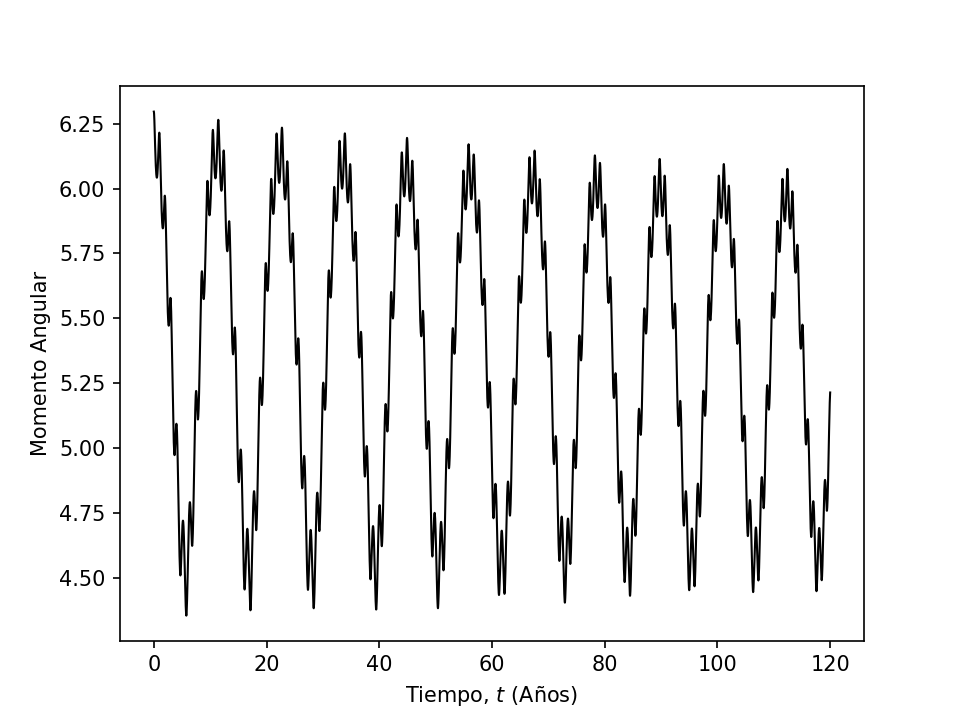

In [53]:
mplot(3,t,MA,r'Tiempo, $t$ (Años)',r'Momento Angular','black',lbl)

<IPython.core.display.Javascript object>


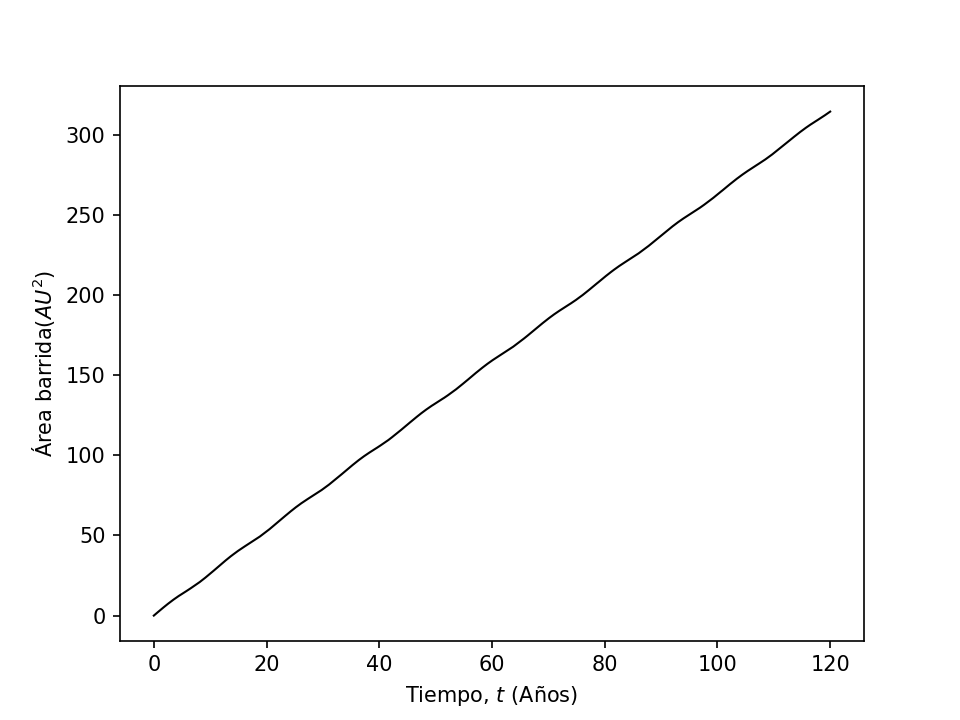

In [54]:
mplot(4,t,AreaVal,r'Tiempo, $t$ (Años)',r'Área barrida($AU^2$)','black',lbl)

In [64]:
# Función de animación. Lee las coordenadas de posición secuencialmente
def animacion(i):
    camino_tierra = 40;
    camino_jupiter = 200;
    tm_yr = 'Tiempo transcurrido = ' + str(round(t[i],1)) + ' años'
    ttl.set_text(tm_yr)
    linea1.set_data(r[i:max(1,i-camino_tierra):-1,0], r[i:max(1,i-camino_tierra):-1,1])
    linea2.set_data(rj[i:max(1,i-camino_jupiter):-1,0], rj[i:max(1,i-camino_jupiter):-1,1])
    

    return (linea1,linea2)

<IPython.core.display.Javascript object>


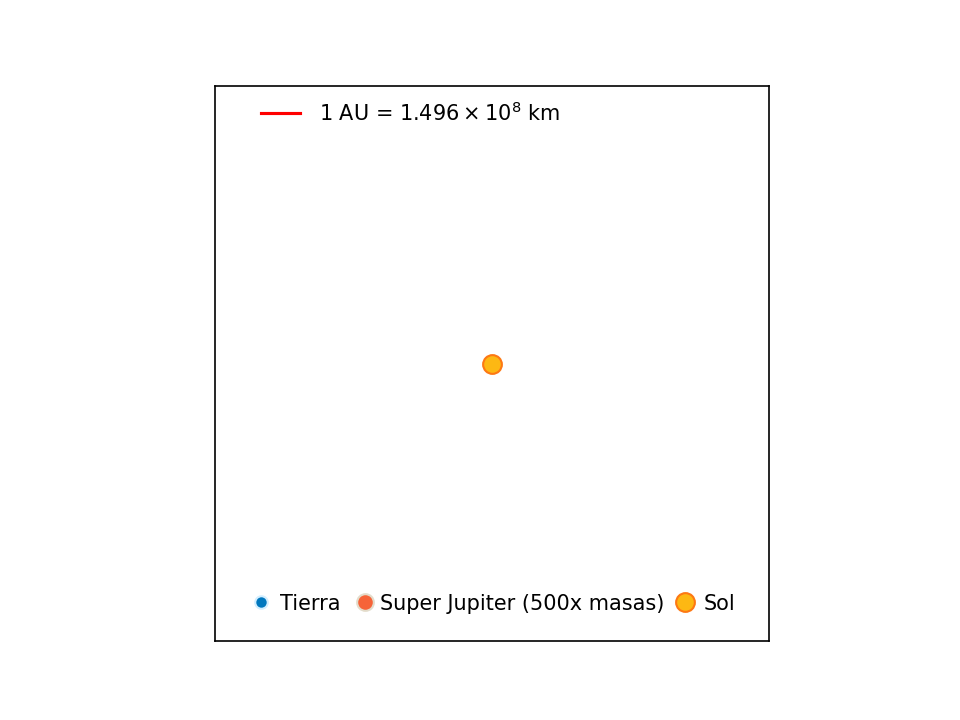

In [83]:
# Función para configurar la animación.

fig, ax = py.subplots()
ax.axis('square')
ax.set_xlim(( -7.2, 7.2))
ax.set_ylim((-7.2, 7.2))
ax.get_xaxis().set_ticks([])    # ocultar las marcas del eje x
ax.get_yaxis().set_ticks([])    # ocultar las marcas del eje y

ax.plot(0,0,'o',markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813" )
linea1, = ax.plot([], [], 'o-',color = '#d2eeff',markevery=10000, markerfacecolor = '#0077BE',lw=2)   # linea para la tierra
linea2, = ax.plot([], [], 'o-',color = '#e3dccb',markersize = 8, markerfacecolor = '#f66338',lw=2,markevery=10000)   # linea para Jupiter


ax.plot([-6,-5],[6.5,6.5],'r-')
ax.text(-4.5,6.3,r'1 AU = $1.496 \times 10^8$ km')

ax.plot(-6,-6.2,'o', color = '#d2eeff', markerfacecolor = '#0077BE')
ax.text(-5.5,-6.4,'Tierra')

ax.plot(-3.3,-6.2,'o', color = '#e3dccb',markersize = 8, markerfacecolor = '#f66338')
ax.text(-2.9,-6.4,'Super Jupiter (500x masas)')

ax.plot(5,-6.2,'o', markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
ax.text(5.5,-6.4,'Sol')
ttl = ax.text(0.24, 1.05, '', transform = ax.transAxes, va='center')    

# Llamar a la función de animación

anim = animation.FuncAnimation(fig, animacion(40), init_func=init,
                               frames=4000, interval=5, blit=True)

El efecto de Júpiter en la órbita de la Tierra se puede visualizar usando el cuaderno del sistema Tierra-Júpiter-Sol. Se consideró que la masa de Júpiter era 500 veces su masa original. El efecto en la órbita de la Tierra debido a la presencia de este "Super Júpiter" se puede notar fácilmente en la animación orbital. Donde su orbita es deformada con la fuerza del "Super Jupiter".

**Conclusión:**


Las ecuaciones de movimiento del sistema solar no se pueden resolverse analíticamente, y el sistema es caótico. 
movimiento que muestra el sistema Tierra-Júpitar-Sol. La perturbación del Super Jupiter se suma a la fuerza gravitatoria 
que actúa sobre la Tierra, suficiente tomar el movimiento estable de la Tierra en una órbita caótica. 
A medida que aumentamos esta perturbación, el movimiento caótico se ve más fácilmente.
El problema de los tres cuerpos definitivamente muestra un movimiento caótico.

**Referencias**

1. Earth fact sheet: https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html
2. Jupiter fact sheet: https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
3. https://www.phas.ubc.ca/~berciu/TEACHING/PHYS349/karla.pdf